In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [18]:
# Step 1: Read the CSV file
file_path = 'C:\\Program Files\\test.csv'  # Replace with your file path
df = pd.read_csv(file_path)

In [19]:
df.head

<bound method NDFrame.head of    sno  transaction id  account no  amount  utr number  layer
0    1      8985676521  9491419384  200000  6305045858      1
1    2      6305045858  9948167556   50000  6300220231      2
2    3      6305045858  8975846859  150000  8919652766      2
3    4      8919652766  4578596856  100000  7845748596      3
4    5      8956415236  5236478563  560000  8974589685      1>

In [20]:
# Step 2: Create a directed graph
G = nx.DiGraph()

In [21]:
# Add nodes and edges
for _, row in df.iterrows():
    layer = row['layer']
    utr_number = row['utr number']
    transaction_id = row['transaction id']

    # Add node for the current transaction with details
    G.add_node(transaction_id, layer=layer, amount=row['amount'], account_no=row['account no'], utr_number=utr_number)

    # If the transaction's UTR number matches the transaction ID in the next layer, create an edge
    matching_row = df[df['transaction id'] == utr_number]
    if not matching_row.empty:
        next_transaction_id = matching_row.iloc[0]['transaction id']
        G.add_edge(transaction_id, next_transaction_id)

In [22]:
# Step 3: Generate positions for each node
pos = nx.spring_layout(G)

# Create edge trace for Plotly
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=2, color='gray'),
        hoverinfo='none',
        mode='lines'
    ))

# Create node trace for Plotly
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition='bottom center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=20,
        colorbar=dict(
            thickness=15,
            title='Layer',
            xanchor='left',
            titleside='right'
        )
    )
)

In [23]:
# Step 4: Add nodes and annotations
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'].append(x)
    node_trace['y'].append(y)

    # Customize hover text for each node
    hover_text = f"Transaction ID: {node}<br>" \
                 f"Account No: {G.nodes[node]['account_no']}<br>" \
                 f"Amount: {G.nodes[node]['amount']}<br>" \
                 f"UTR Number: {G.nodes[node]['utr_number']}<br>" \
                 f"Layer: {G.nodes[node]['layer']}"
    node_trace['text'].append(hover_text)
    node_trace['marker']['color'].append(G.nodes[node]['layer'])

AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
# Step 5: Plot the graph using Plotly
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='<br>Interactive Transaction Layer Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper"
                    )],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                )
                )

In [ ]:
fig.show()

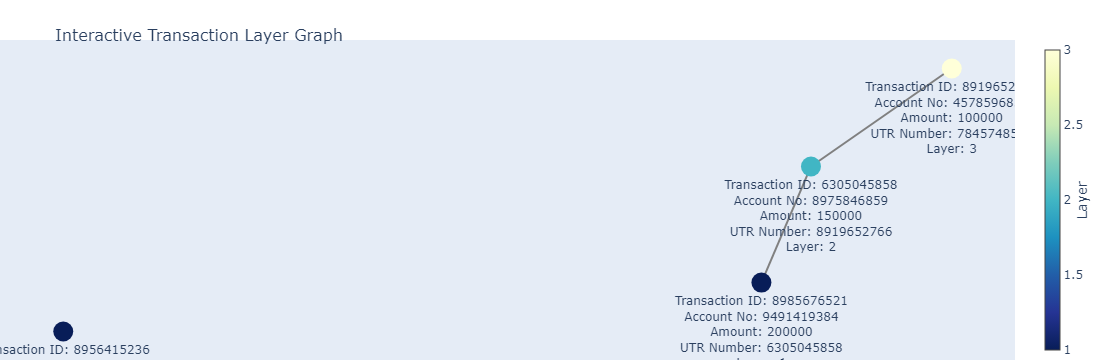

In [3]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go

# Sample data as a dictionary
data = {
    'sno': [1, 2, 3, 4, 5],
    'transaction id': [8985676521, 6305045858, 6305045858, 8919652766, 8956415236],
    'account no': [9491419384, 9948167556, 8975846859, 4578596856, 5236478563],
    'amount': [200000, 50000, 150000, 100000, 560000],
    'utr number': [6305045858, 6300220231, 8919652766, 7845748596, 8974589685],
    'layer': [1, 2, 2, 3, 1]
}

# Step 1: Load the data into a DataFrame
df = pd.DataFrame(data)

# Step 2: Create the graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges
for _, row in df.iterrows():
    layer = row['layer']
    utr_number = row['utr number']
    transaction_id = row['transaction id']

    # Add node for the current transaction with details
    G.add_node(transaction_id, layer=layer, amount=row['amount'], account_no=row['account no'], utr_number=utr_number)

    # If the transaction's UTR number matches the transaction ID in the next layer, create an edge
    matching_row = df[df['transaction id'] == utr_number]
    if not matching_row.empty:
        next_transaction_id = matching_row.iloc[0]['transaction id']
        G.add_edge(transaction_id, next_transaction_id)

# Step 3: Generate positions for each node
pos = nx.spring_layout(G)

# Prepare data for Plotly
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    # Customize hover text for each node
    hover_text = f"Transaction ID: {node}<br>" \
                 f"Account No: {G.nodes[node]['account_no']}<br>" \
                 f"Amount: {G.nodes[node]['amount']}<br>" \
                 f"UTR Number: {G.nodes[node]['utr_number']}<br>" \
                 f"Layer: {G.nodes[node]['layer']}"
    node_text.append(hover_text)
    node_color.append(G.nodes[node]['layer'])

# Create the node trace
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition='bottom center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=20,
        colorbar=dict(
            thickness=15,
            title='Layer',
            xanchor='left',
            titleside='right'
        )
    )
)

# Create edge trace for Plotly
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=2, color='gray'),
        hoverinfo='none',
        mode='lines'
    ))

# Step 5: Plot the graph using Plotly
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='<br>Interactive Transaction Layer Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper"
                    )],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                )
                )

fig.show()
